In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

In [49]:
df_liver  = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 34 - Liver Disease Prediction Classification\liver.csv')
df = df_liver.copy()

In [50]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [52]:
df.duplicated().sum()

np.int64(13)

In [53]:
df = df.drop_duplicates()

In [54]:
df.shape

(570, 11)

In [55]:
df[df['Albumin_and_Globulin_Ratio'].isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [56]:
df = df.dropna()
df.shape

(566, 11)

In [57]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [58]:
df['Dataset'] = df['Dataset'].map({2: 0, 1: 1})
df['Dataset'].value_counts()

Dataset
1    404
0    162
Name: count, dtype: int64

In [59]:
df['Gender'].value_counts()

Gender
1    428
0    138
Name: count, dtype: int64

In [60]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,0.133821
Gender,0.057542,1.000000,0.089068,0.100448,-0.024879,0.083336,0.080593,-0.092049,-0.093208,-0.005611,0.077396
Total_Bilirubin,0.010704,0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,0.224467
Direct_Bilirubin,0.006268,0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,0.250926
Alkaline_Phosphotase,0.080085,-0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.186057
Alamine_Aminotransferase,-0.084319,0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,0.161617
Aspartate_Aminotransferase,-0.017352,0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,0.151009
Total_Protiens,-0.195893,-0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,-0.036443
Albumin,-0.269448,-0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,-0.165273
Albumin_and_Globulin_Ratio,-0.215967,-0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,-0.171402


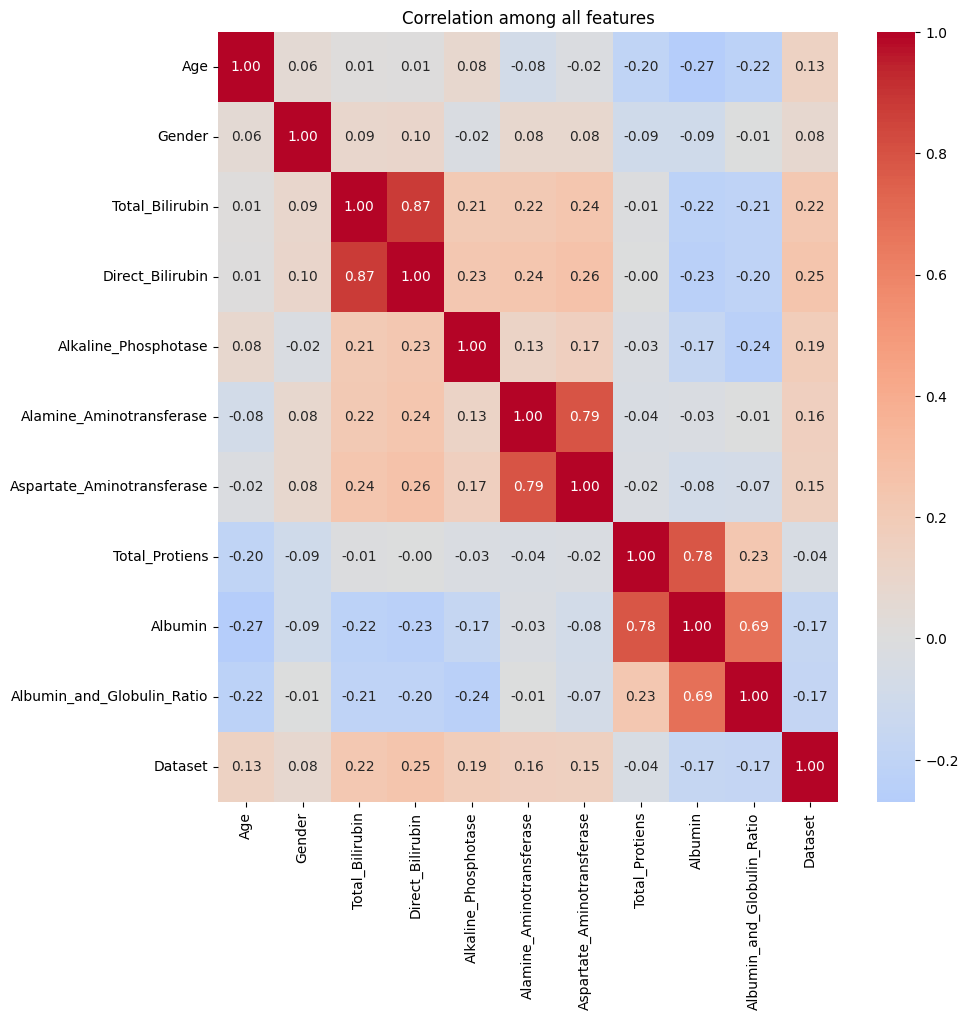

In [61]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', center = 0)
plt.title('Correlation among all features')
plt.show()

# Strong Positive Correlation 
# Total Biliburin and Direct Biliburin has strong positive correlation (mulitcollinear)
# Alamine_Aminotransferase and Aspartate_Aminotransferase, rise together when liver is damaged, might only need one. (ALT since has a higher correlation than AST)
# Total Protein and Albumin is both protein (multicollinear)
# Albumin and Albumin_and_Globulin_Ratio (multicollinear)
# All are observed to have positive correlation with having disease except for total protein, albumin, Albumin_and_Globulin_Ratio
# Gender has a weak correlation with having the disease

# Might keep the following cols: Direct_Bilirubin, ALT, ALP, Albumin, A/G Ratio, Age, Gender


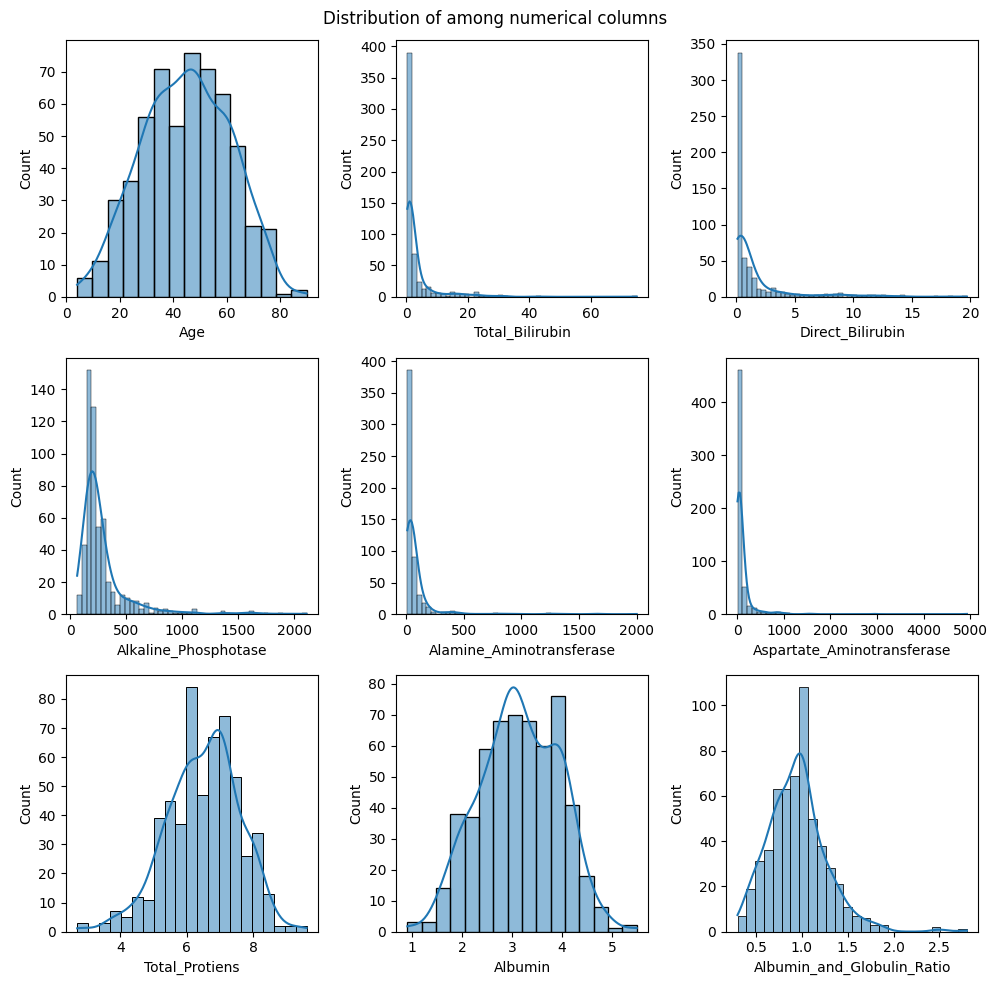

In [62]:
num_cols = df.select_dtypes(include = ['float64', 'int64']).columns.drop(['Dataset', 'Gender'])

fig, axes = plt.subplots(3, 3, figsize = (10,10))
axes = axes.flatten()

for i, cols in enumerate(num_cols):
    sns.histplot(x= cols, data = df, kde = True, ax = axes[i])

plt.suptitle(f'Distribution of among numerical columns')
plt.tight_layout()
plt.show()


# age, albumin, total_protein normally distributed
# total_biliburin, direct_biliburin, alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase, albumin_and_globulin_Ratio right skewed -- majority of patient have low counts

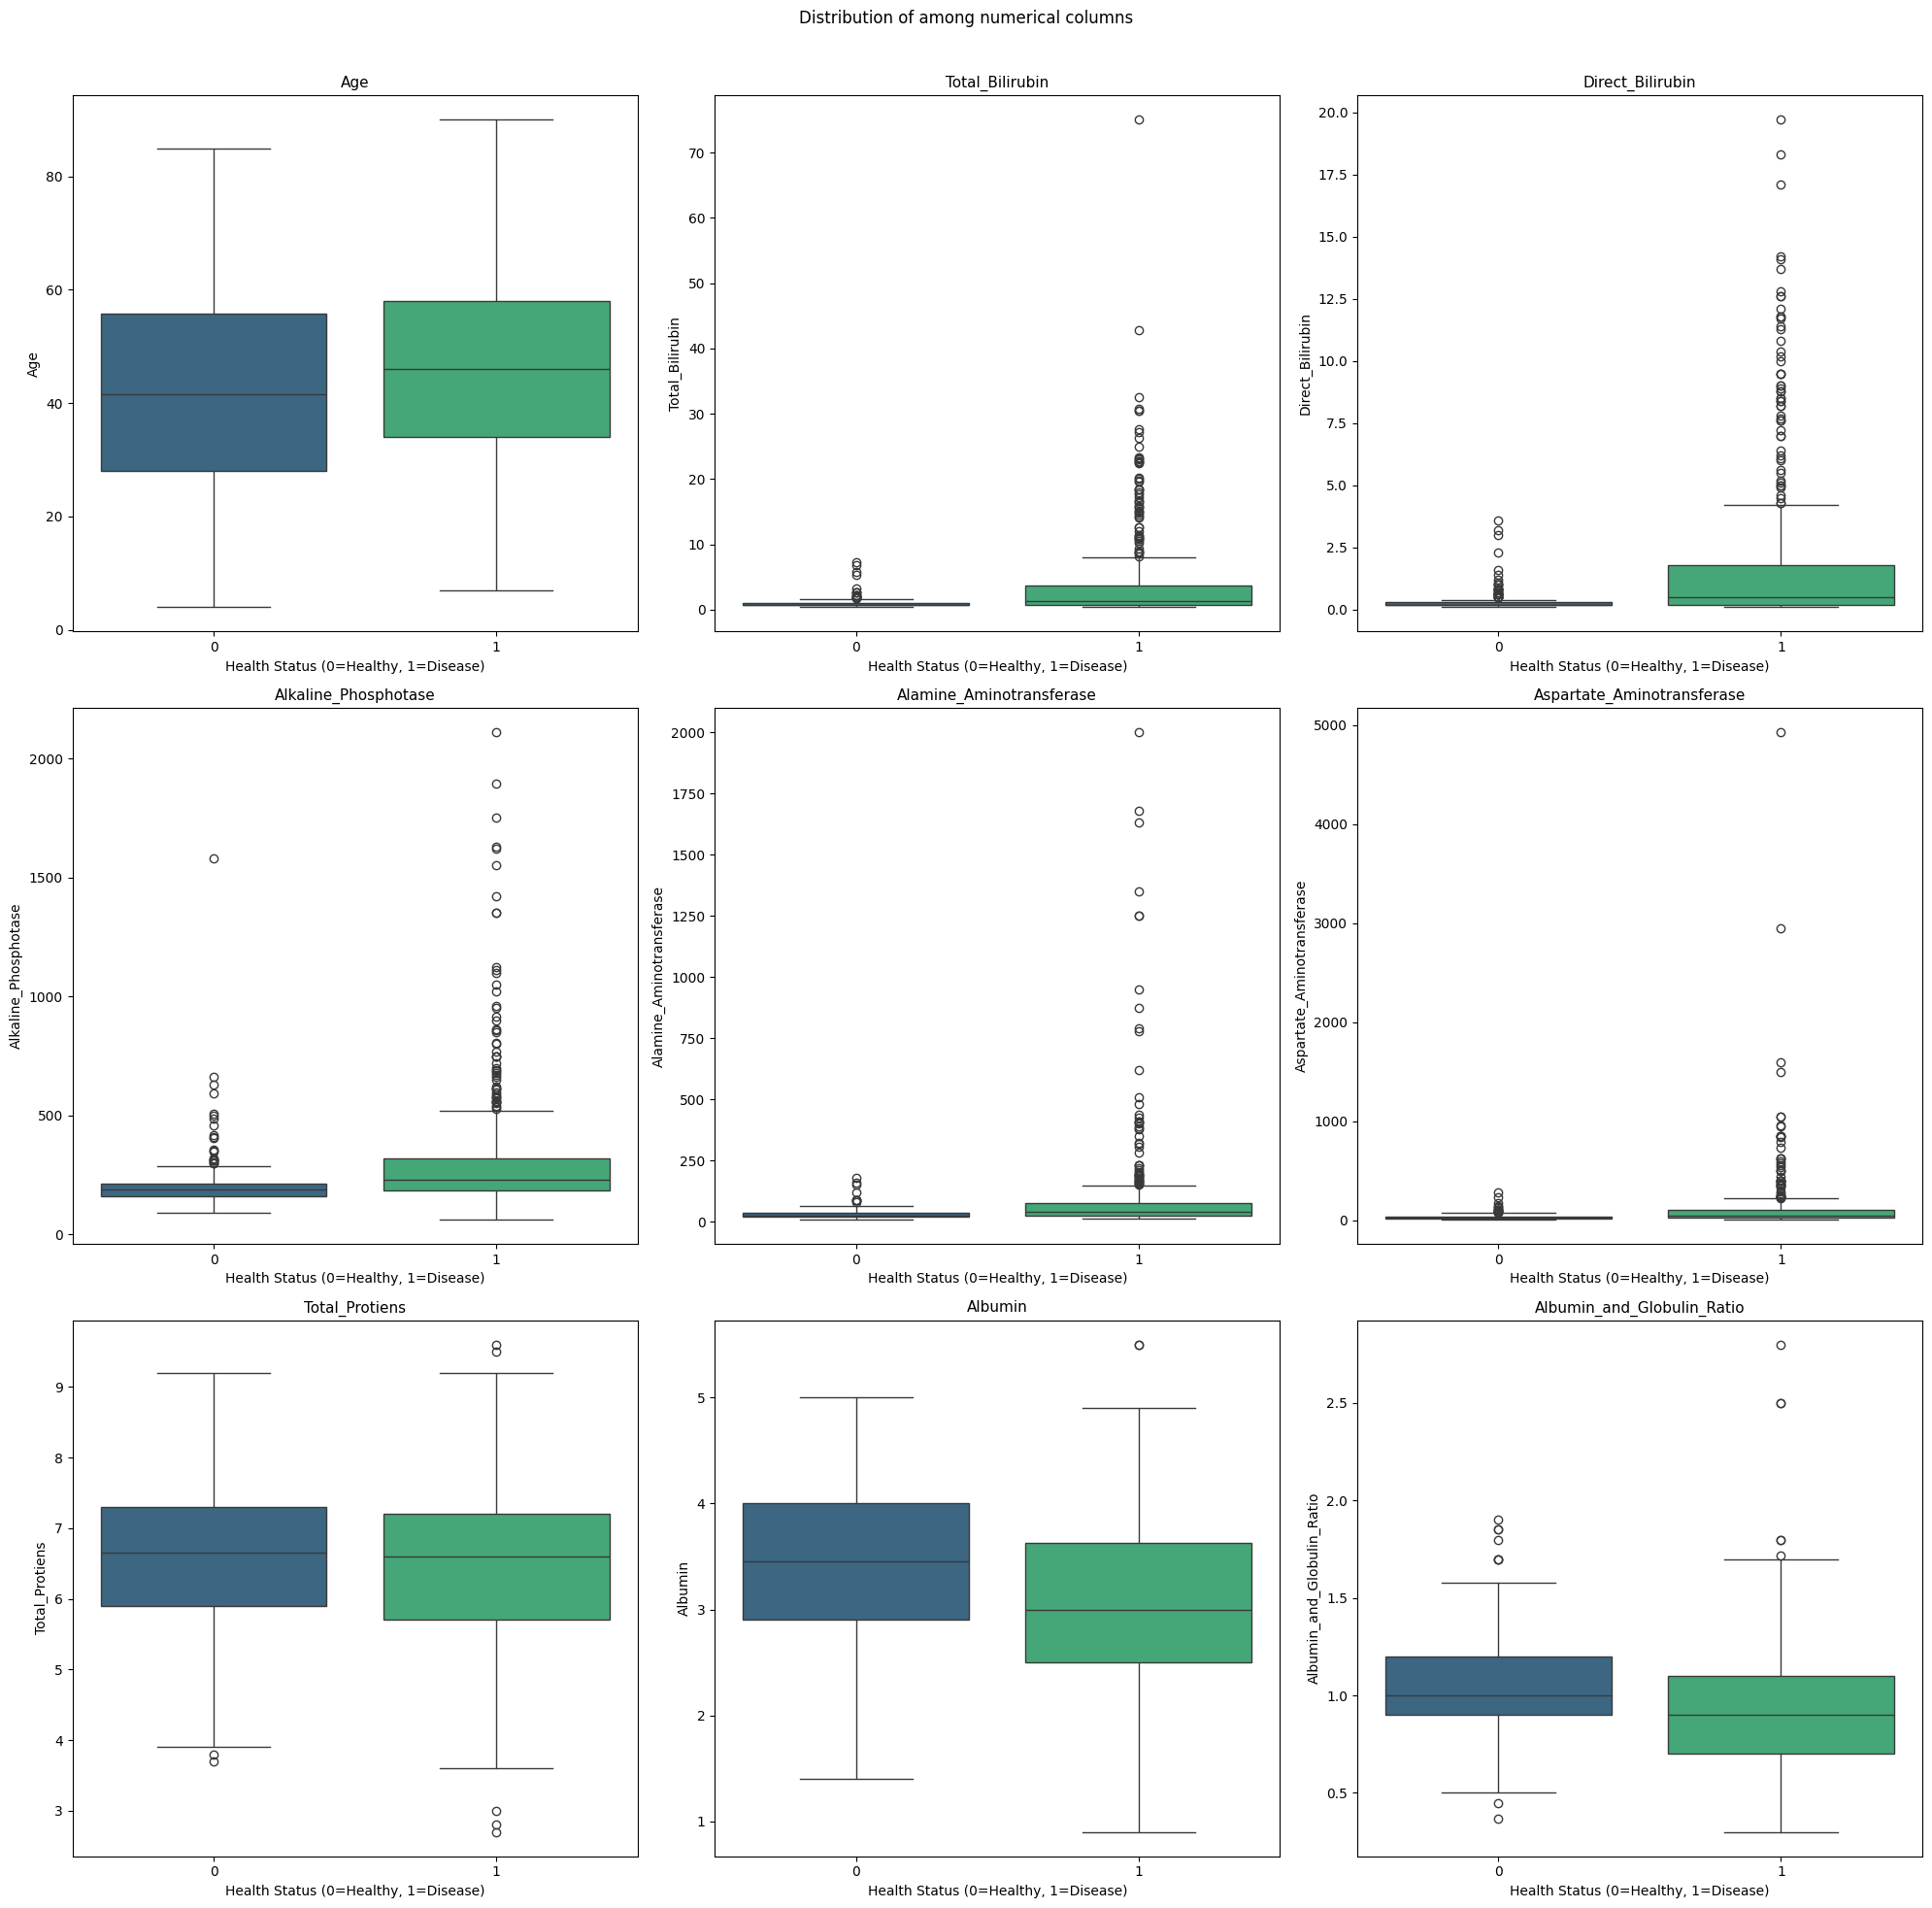

In [63]:
num_cols = df.select_dtypes(include = ['float64', 'int64']).columns.drop(['Dataset', 'Gender'])

fig, axes = plt.subplots(3, 3, figsize = (20,20))
axes = axes.flatten()

for i, cols in enumerate(num_cols):
    sns.boxplot(x = 'Dataset', 
                y= cols, 
                data = df, 
                ax = axes[i], 
                palette= 'viridis',
                hue='Dataset', 
                legend= False)
    axes[i].set_title(f'{cols}', fontsize=11)
    axes[i].set_xlabel('Health Status (0=Healthy, 1=Disease)')

plt.suptitle(f'Distribution of among numerical columns')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# 

In [64]:
from scipy.stats import ttest_ind

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Dataset', 'Gender'])
results = []

for col in num_cols:
    t, p = ttest_ind(df[df['Dataset']==1][col], df[df['Dataset']==0][col])
    results.append({'Feature': col, 'p-value': round(p, 5)})

pd.DataFrame(results).sort_values('p-value')


,Feature,p-value
1,Total_Bilirubin,0.00000
2,Direct_Bilirubin,0.00000
3,Alkaline_Phosphotase,0.00001
8,Albumin_and_Globulin_Ratio,0.00004
7,Albumin,0.00008
4,Alamine_Aminotransferase,0.00011
5,Aspartate_Aminotransferase,0.00031
0,Age,0.00142
6,Total_Protiens,0.38683


In [65]:
X = df.drop(columns= ['Total_Bilirubin', 'Total_Protiens', 'Dataset'])
y = df['Dataset']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [67]:
scaler = RobustScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [68]:
# compute class ratio (negative / positive)
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
ratio = neg / pos
print("neg/pos ratio:", ratio)

# example candidates (try slightly lower than full ratio to avoid all-positive)
spw_candidates = [ratio * x for x in [0.6, 0.8, 1.0]]
print(spw_candidates)


neg/pos ratio: 0.3993808049535604
[np.float64(0.2396284829721362), np.float64(0.31950464396284833), np.float64(0.3993808049535604)]


In [69]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state= 2),
        'params':{
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state= 2),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split':[10, 20],
            'min_samples_leaf': [5, 10],
            'class_weight': ['balanced', 'balanced_subsample']
        }
    },
    'SVC':{
        'model': SVC(random_state= 2),
        'params':{
            'C':[0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced']
        }
    },
    'XGBoost':{
        'model': XGBClassifier(random_state = 2, use_label_encoder=False, eval_metric='logloss'),
        'params':{
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'min_child_weight': [5, 10],
            'subsample': [0.6, 0.7],
            'colsample_bytree': [0.7, 0.8, 1.0],
            'n_estimators': [100, 200],
            'reg_alpha': [0.1, 1],
            'reg_lambda': [1,2],
            'scale_pos_weight': [2.0, 2.5, 3.0]
        }
    },
    'LightBGM':{
        'model': LGBMClassifier(random_state = 2),
        'params':{
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'min_child_samples': [20, 30],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'class_weight': ['balanced']

        }
    },
    'CatBoost':{
        'model': CatBoostClassifier(random_state= 2, verbose= 0, allow_writing_files= False),
        'params':{
            'iterations': [200, 300],
            'learning_rate': [0.01, 0.05],
            'depth': [4, 6],
            'l2_leaf_reg': [3, 5, 10],
            'border_count': [32, 64],
            'auto_class_weights': ['Balanced']
        }
    }
}

In [70]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        n_jobs = -1,
        scoring = 'f1',
        verbose = 1
    )

    grid_search.fit(X_scaled_train, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_scaled_train)
    test_pred = grid_search.best_estimator_.predict(X_scaled_test)

    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train F1': f1_score(y_train, train_pred),
        'Test F1': f1_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred)
    }

best_model_name =  max(results.keys(), key = lambda x: results[x]['Test F1'])
best_model = results[best_model_name]['best_model']


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [71]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train F1': result['Train F1'],
        'Test F1': result['Test F1'],
        'Overfit Gap': result['Train F1'] - result['Test F1'],
        'Precision': result['Precision'],
        'Recall': result['Recall']})

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Test F1', ascending= False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Train F1,Test F1,Overfit Gap,Precision,Recall
3,XGBoost,0.8379,0.8308,0.0071,0.7105,1.0000
1,Random Forest,0.8399,0.8138,0.0261,0.9219,0.7284
4,LightBGM,1.0000,0.7949,0.2051,0.8267,0.7654
5,CatBoost,0.9906,0.7922,0.1984,0.8356,0.7531
0,Logistic Regression,0.7338,0.7724,-0.0386,0.8750,0.6914
2,SVC,0.6680,0.6557,0.0123,0.9756,0.4938


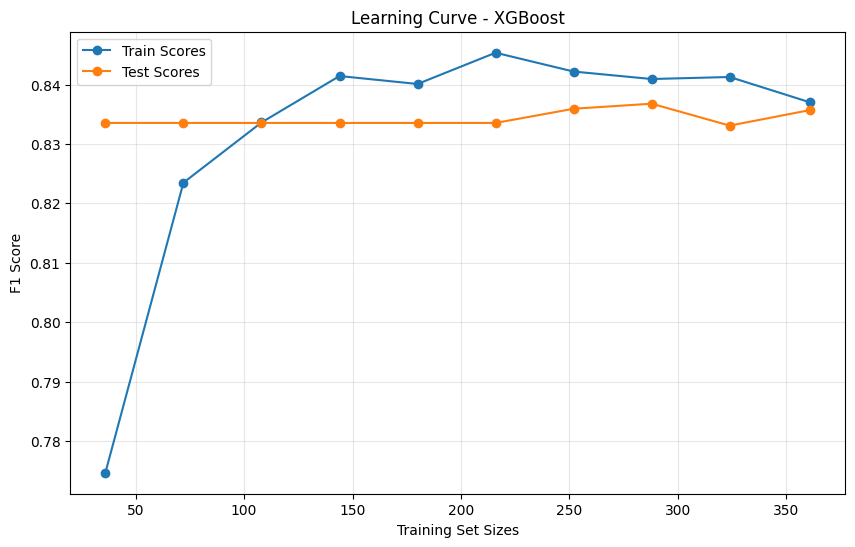

In [72]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_scaled_train, y_train,
    cv = 5,
    scoring = 'f1',
    train_sizes = np.linspace(0.1, 1.0, 10),
    n_jobs = -1
)

plt.figure(figsize = (10,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), label = 'Train Scores', marker = 'o' )
plt.plot(train_sizes, test_scores.mean(axis = 1), label = 'Test Scores', marker = 'o' )
plt.xlabel('Training Set Sizes')
plt.ylabel('F1 Score')
plt.title(f'Learning Curve - {best_model_name}')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [73]:
cv_scores = cross_val_score(
    best_model,
    X_scaled_train, y_train,
    cv = 5,
    scoring= 'f1'
)

print(f'CV F1 Scores: {cv_scores}')
print(f'Mean: {cv_scores.mean(): .3f}')
print(f'STD: {cv_scores.std(): .3f}')

CV F1 Scores: [0.83333333 0.83333333 0.83870968 0.83116883 0.83116883]
Mean:  0.834
STD:  0.003


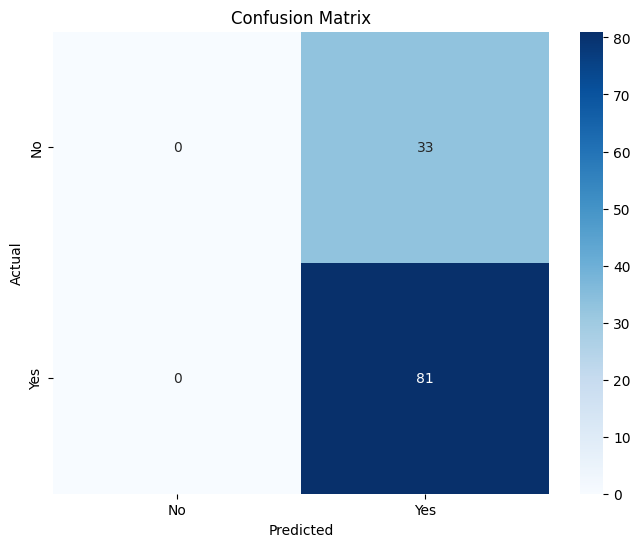

In [74]:
y_pred = best_model.predict(X_scaled_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels= ['No', 'Yes'],
            yticklabels= ['No','Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual'),
plt.title('Confusion Matrix')
plt.show()

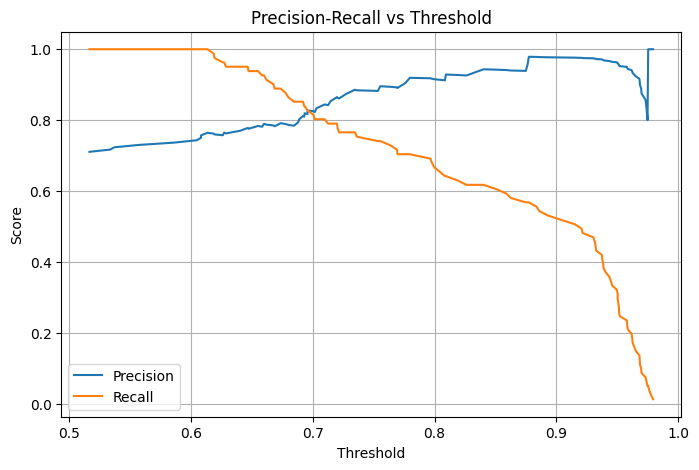

In [77]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for class 1 (disease)
y_proba = best_model.predict_proba(X_scaled_test)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision vs Recall vs Threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
best_f1, best_t = 0, 0
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1, best_t = f1, t

print(f"Best F1 threshold: {best_t:.3f}, F1: {best_f1:.3f}")


Best F1 threshold: 0.614, F1: 0.866


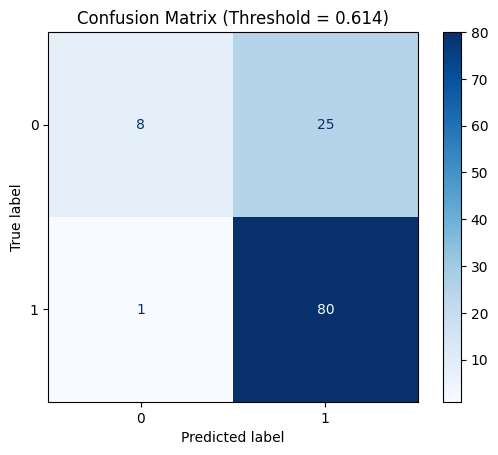

              precision    recall  f1-score   support

           0      0.889     0.242     0.381        33
           1      0.762     0.988     0.860        81

    accuracy                          0.772       114
   macro avg      0.825     0.615     0.621       114
weighted avg      0.799     0.772     0.721       114



In [79]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_pred_adj = (y_proba >= 0.614).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_adj, cmap='Blues')
plt.title("Confusion Matrix (Threshold = 0.614)")
plt.show()

print(classification_report(y_test, y_pred_adj, digits=3))